In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.shape

(45593, 20)

In [6]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [8]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


In [9]:
# Remove '(min)' text and convert to integer
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('(min)', '', regex=False)
df['Time_taken(min)'] = df['Time_taken(min)'].str.strip().astype(int)

df['Time_taken(min)'].head()


,Time_taken(min)
0,24
1,33
2,26
3,21
4,30


In [10]:
# List of categorical columns to clean
cat_cols = ['Weatherconditions', 'Road_traffic_density',
            'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()


In [11]:
# remove prefix "conditions " from weather column
df['Weatherconditions'] = df['Weatherconditions'].str.replace('conditions ', '')

In [12]:
print(df.dtypes)

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                  int64
dtype: object


In [13]:
# Convert Order_Date to datetime (day-month-year)
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y', errors='coerce')

# Convert Time columns (hour:minute:second)
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce').dt.time
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce').dt.time

# Check the first few rows
df[['Order_Date', 'Time_Orderd', 'Time_Order_picked']].head()


,Order_Date,Time_Orderd,Time_Order_picked
0,2022-03-19,11:30:00,11:45:00
1,2022-03-25,19:45:00,19:50:00
2,2022-03-19,08:30:00,08:45:00
3,2022-04-05,18:00:00,18:10:00
4,2022-03-26,13:30:00,13:45:00


In [14]:
# Replace "NaN ", "NaN", "--" with np.nan
df.replace(["NaN ", "NaN", "nan", "--", "null", ""], np.nan, inplace=True)

In [15]:
print(df.isnull().sum())

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64


In [16]:
#Drop rows with missing values
df = df.dropna()

In [17]:
print(df.shape)

(41368, 20)


In [18]:
# Convert Age & Ratings columns to numeric (force errors to NaN)
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')

In [19]:
print(df[['Delivery_person_Age','Delivery_person_Ratings']].describe())

       Delivery_person_Age  Delivery_person_Ratings
count         41368.000000             41368.000000
mean             29.610013                 4.633209
std               5.764152                 0.315861
min              20.000000                 2.500000
25%              25.000000                 4.500000
50%              30.000000                 4.700000
75%              35.000000                 4.900000
max              39.000000                 5.000000


In [20]:
# Drop unrealistic ages (keep only between 18 and 65)
df = df[(df['Delivery_person_Age'] >= 18) & (df['Delivery_person_Age'] <= 65)]


In [21]:
# Cap ratings between 1 and 5
df = df[(df['Delivery_person_Ratings'] >= 1) & (df['Delivery_person_Ratings'] <= 5)]


In [22]:
print(df.shape)

(41368, 20)


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 41368 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           41368 non-null  object        
 1   Delivery_person_ID           41368 non-null  object        
 2   Delivery_person_Age          41368 non-null  int64         
 3   Delivery_person_Ratings      41368 non-null  float64       
 4   Restaurant_latitude          41368 non-null  float64       
 5   Restaurant_longitude         41368 non-null  float64       
 6   Delivery_location_latitude   41368 non-null  float64       
 7   Delivery_location_longitude  41368 non-null  float64       
 8   Order_Date                   41368 non-null  datetime64[ns]
 9   Time_Orderd                  41368 non-null  object        
 10  Time_Order_picked            41368 non-null  object        
 11  Weatherconditions            41368 non-null  o

In [24]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,sunny,high,2,snack,motorcycle,0,no,urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,stormy,jam,2,snack,scooter,1,no,metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,sandstorms,low,0,drinks,motorcycle,1,no,urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,sunny,medium,0,buffet,motorcycle,1,no,metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,cloudy,high,1,snack,scooter,1,no,metropolitian,30


In [25]:
# Save cleaned dataset
df.to_csv("cleaned_food_delivery.csv", index=False)

#Calculate Distance

In [26]:
# Haversine formula to calculate distance between two coordinates
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Apply formula to dataset
df['Distance_km'] = haversine_distance(
    df['Restaurant_latitude'], df['Restaurant_longitude'],
    df['Delivery_location_latitude'], df['Delivery_location_longitude']
)

# Check results
print(df[['Restaurant_latitude','Restaurant_longitude',
          'Delivery_location_latitude','Delivery_location_longitude','Distance_km']].head())


   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Distance_km  
0                    75.912471     3.025149  
1                    77.813237    20.183530  
2                    77.688400     1.552758  
3                    77.026494     7.790401  
4                    80.289982     6.210138  


#Order to pickup duration

In [27]:
# First, convert times properly to datetime.time if not already done
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce')

# Calculate difference (in seconds → then convert to minutes)
df['Order_to_pickup_min'] = (df['Time_Order_picked'] - df['Time_Orderd']).dt.total_seconds() / 60

# Some values may be negative or NaN if times are missing → handle them
df['Order_to_pickup_min'] = df['Order_to_pickup_min'].fillna(0)   # replace NaN with 0
df.loc[df['Order_to_pickup_min'] < 0, 'Order_to_pickup_min'] = 0  # fix negative values

# Check results
print(df[['Time_Orderd','Time_Order_picked','Order_to_pickup_min']].head())


          Time_Orderd   Time_Order_picked  Order_to_pickup_min
0 1900-01-01 11:30:00 1900-01-01 11:45:00                 15.0
1 1900-01-01 19:45:00 1900-01-01 19:50:00                  5.0
2 1900-01-01 08:30:00 1900-01-01 08:45:00                 15.0
3 1900-01-01 18:00:00 1900-01-01 18:10:00                 10.0
4 1900-01-01 13:30:00 1900-01-01 13:45:00                 15.0


#Extract Date & Time feature

In [28]:
# Make sure Order_Date is datetime type
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Extract features from Order_Date
df['day'] = df['Order_Date'].dt.day
df['month'] = df['Order_Date'].dt.month
df['weekday'] = df['Order_Date'].dt.weekday  # Monday=0, Sunday=6
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Extract features from Order time
df['hour'] = df['Time_Orderd'].dt.hour

# Define peak hours (lunch 11–14, dinner 18–21)
df['peak_hour'] = df['hour'].apply(lambda h: 1 if (11 <= h <= 14) or (18 <= h <= 21) else 0)

# Check results
print(df[['Order_Date','Time_Orderd','day','month','weekday','is_weekend','hour','peak_hour']].head())


  Order_Date         Time_Orderd  day  month  weekday  is_weekend  hour  \
0 2022-03-19 1900-01-01 11:30:00   19      3        5           1    11   
1 2022-03-25 1900-01-01 19:45:00   25      3        4           0    19   
2 2022-03-19 1900-01-01 08:30:00   19      3        5           1     8   
3 2022-04-05 1900-01-01 18:00:00    5      4        1           0    18   
4 2022-03-26 1900-01-01 13:30:00   26      3        5           1    13   

   peak_hour  
0          1  
1          1  
2          0  
3          1  
4          1  


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41368 entries, 0 to 45592
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           41368 non-null  object        
 1   Delivery_person_ID           41368 non-null  object        
 2   Delivery_person_Age          41368 non-null  int64         
 3   Delivery_person_Ratings      41368 non-null  float64       
 4   Restaurant_latitude          41368 non-null  float64       
 5   Restaurant_longitude         41368 non-null  float64       
 6   Delivery_location_latitude   41368 non-null  float64       
 7   Delivery_location_longitude  41368 non-null  float64       
 8   Order_Date                   41368 non-null  datetime64[ns]
 9   Time_Orderd                  41368 non-null  datetime64[ns]
 10  Time_Order_picked            41368 non-null  datetime64[ns]
 11  Weatherconditions            41368 non-null  o

In [30]:
# Step 1: drop raw redundant columns
cols_to_drop = [
    'Restaurant_latitude','Restaurant_longitude',
    'Delivery_location_latitude','Delivery_location_longitude',
    'Order_Date','Time_Orderd','Time_Order_picked', 'ID', 'Delivery_person_ID'
]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors='ignore')
df.shape


(41368, 19)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41368 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      41368 non-null  int64  
 1   Delivery_person_Ratings  41368 non-null  float64
 2   Weatherconditions        41368 non-null  object 
 3   Road_traffic_density     41368 non-null  object 
 4   Vehicle_condition        41368 non-null  int64  
 5   Type_of_order            41368 non-null  object 
 6   Type_of_vehicle          41368 non-null  object 
 7   multiple_deliveries      41368 non-null  object 
 8   Festival                 41368 non-null  object 
 9   City                     41368 non-null  object 
 10  Time_taken(min)          41368 non-null  int64  
 11  Distance_km              41368 non-null  float64
 12  Order_to_pickup_min      41368 non-null  float64
 13  day                      41368 non-null  int32  
 14  month                    41

#checks & fix data types / missing values

In [32]:
# Ensure target numeric
df['Time_taken(min)'] = df['Time_taken(min)'].astype(str).str.replace(r'[^0-9.-]', '', regex=True)
df['Time_taken(min)'] = pd.to_numeric(df['Time_taken(min)'], errors='coerce')

# multiple_deliveries numeric; if missing assume 1 (or choose median)
df['multiple_deliveries'] = pd.to_numeric(df.get('multiple_deliveries', np.nan), errors='coerce')
df['multiple_deliveries'] = df['multiple_deliveries'].fillna(1).astype(int)

# Quick missing-value report
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing>0])

# Example imputation policy for numeric columns with a few nulls:
num_cols = ['Delivery_person_Age','Delivery_person_Ratings','Distance_km','Order_to_pickup_min']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
        df[c] = df[c].fillna(df[c].median())

# Verify no nulls left in features/target you will use
print("Nulls after imputation:")
print(df[num_cols + ['Time_taken(min)']].isnull().sum())


Series([], dtype: int64)
Nulls after imputation:
Delivery_person_Age        0
Delivery_person_Ratings    0
Distance_km                0
Order_to_pickup_min        0
Time_taken(min)            0
dtype: int64


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41368 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      41368 non-null  int64  
 1   Delivery_person_Ratings  41368 non-null  float64
 2   Weatherconditions        41368 non-null  object 
 3   Road_traffic_density     41368 non-null  object 
 4   Vehicle_condition        41368 non-null  int64  
 5   Type_of_order            41368 non-null  object 
 6   Type_of_vehicle          41368 non-null  object 
 7   multiple_deliveries      41368 non-null  int64  
 8   Festival                 41368 non-null  object 
 9   City                     41368 non-null  object 
 10  Time_taken(min)          41368 non-null  int64  
 11  Distance_km              41368 non-null  float64
 12  Order_to_pickup_min      41368 non-null  float64
 13  day                      41368 non-null  int32  
 14  month                    41

#Define numeric & categorical feature lists

In [34]:
numeric_features = [
    'Delivery_person_Age',
    'Delivery_person_Ratings',
    'Distance_km',
    'Order_to_pickup_min',
    'multiple_deliveries'
]

categorical_features = [
    'Weatherconditions',
    'Road_traffic_density',
    'Type_of_order',
    'Type_of_vehicle',
    'Festival',
    'City'
]

# sanity: keep only features that exist
numeric_features = [c for c in numeric_features if c in df.columns]
categorical_features = [c for c in categorical_features if c in df.columns]

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)


Numeric: ['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance_km', 'Order_to_pickup_min', 'multiple_deliveries']
Categorical: ['Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']


#train/test split

In [35]:
from sklearn.model_selection import train_test_split

X = df[numeric_features + categorical_features].copy()
y = df['Time_taken(min)'].copy()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (33094, 11) Test: (8274, 11)


#Build ColumnTransformer + Pipeline + Models (StandardScaler + OneHotEncoder + RF)

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'  # drop any other columns
)


dt_pipeline = Pipeline([("preprocessor", preprocessor), ("model", DecisionTreeRegressor(random_state=42))])
lr_pipeline = Pipeline([("preprocessor", preprocessor), ("model", LinearRegression())])
rf_pipeline = Pipeline([("preprocessor", preprocessor), ("model", RandomForestRegressor(random_state=42))])

# Fit (note: preprocessor will refit inside each pipeline)
dt_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

y_pred_dt = dt_pipeline.predict(X_test)
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

# metrics
def metrics(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

results = {
    "RandomForest": metrics(y_test, y_pred_rf),
    "DecisionTree": metrics(y_test, y_pred_dt),
    "LinearRegression": metrics(y_test, y_pred_lr)
}

results_df = pd.DataFrame(results).T.reset_index().rename(columns={"index":"model"})
print(results_df)



              model       MAE      RMSE        R2
0      RandomForest  3.503999  4.468136  0.772505
1      DecisionTree  4.563814  6.037661  0.584609
2  LinearRegression  4.983287  6.327802  0.543727


In [37]:

# RandomForest
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])


In [38]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Delivery_person_Age',
                                                   'Delivery_person_Ratings',
                                                   'Distance_km',
                                                   'Order_to_pickup_min',
                                                   'multiple_deliveries']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Weatherconditions',
                                                   'Road_traffic_density',
                                                   'Type_of_order',
                                                   'Type_of_vehicle',
                                                   'Festival', 'City'])])),
                ('model',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=5,
                                       min_samples_split=10, n_jobs=-1,
                                       random_state=42))])

#Feature importance

                        feature  importance
1       Delivery_person_Ratings    0.242573
4           multiple_deliveries    0.138964
13     Road_traffic_density_low    0.124778
2                   Distance_km    0.119375
0           Delivery_person_Age    0.099425
9       Weatherconditions_sunny    0.066842
5      Weatherconditions_cloudy    0.057946
6         Weatherconditions_fog    0.051427
20   Type_of_vehicle_motorcycle    0.028379
14  Road_traffic_density_medium    0.014866
12     Road_traffic_density_jam    0.009170
22                  Festival_no    0.007527
23                 Festival_yes    0.006956
3           Order_to_pickup_min    0.005703
26                   City_urban    0.003239


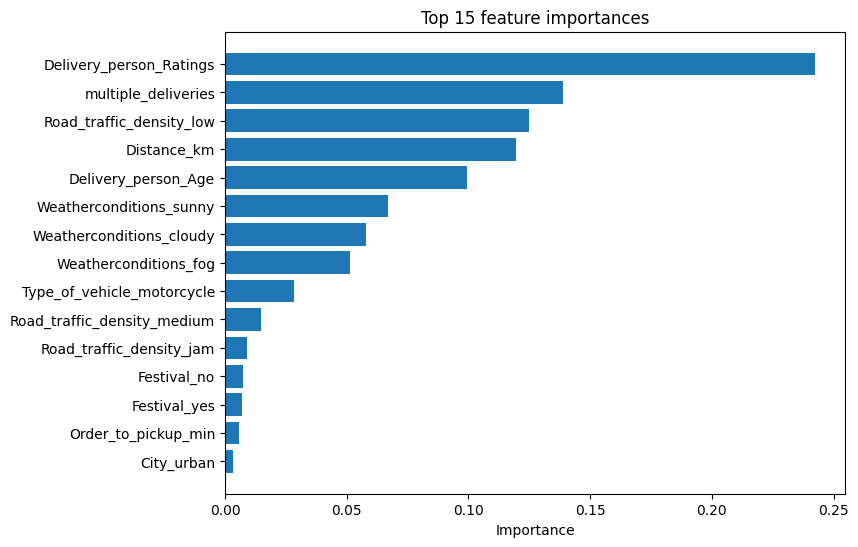

In [39]:
# get numeric names
num_names = numeric_features

# get categorical one-hot names (after fitting)
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_names = list(ohe.get_feature_names_out(categorical_features))

feature_names = num_names + cat_names

import pandas as pd
import matplotlib.pyplot as plt

importances = pipeline.named_steps['model'].feature_importances_
fi = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)

# show top 15
print(fi.head(15))

# plot
plt.figure(figsize=(8,6))
plt.barh(fi['feature'].head(15)[::-1], fi['importance'].head(15)[::-1])
plt.title("Top 15 feature importances")
plt.xlabel("Importance")
plt.show()


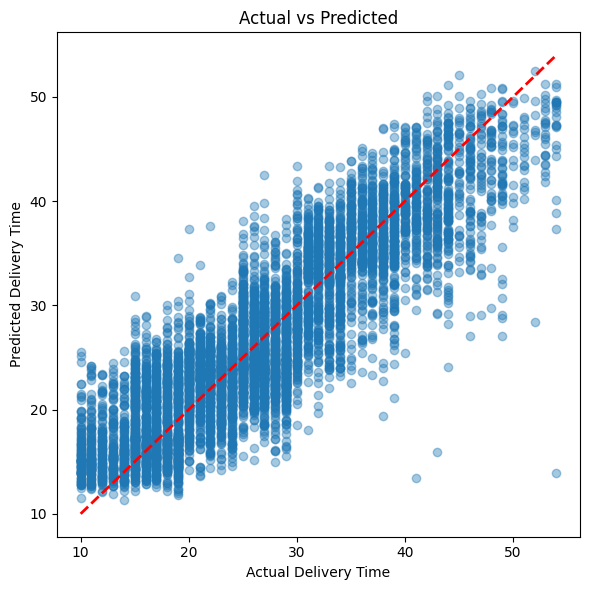

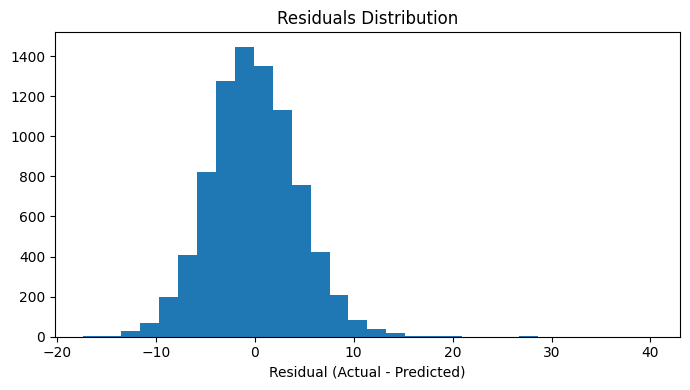

In [40]:

import matplotlib.pyplot as plt

# 2) Actual vs Predicted scatter
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.4)
minv = min(y_test.min(), y_pred_rf.min())
maxv = max(y_test.max(), y_pred_rf.max())
plt.plot([minv, maxv], [minv, maxv], linestyle="--", color="red", linewidth=2)
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()

# 3) Residual histogram
residuals = y_test - y_pred_rf
plt.figure(figsize=(7,4))
plt.hist(residuals, bins=30)
plt.xlabel("Residual (Actual - Predicted)")
plt.title("Residuals Distribution")
plt.tight_layout()
plt.show()


#test for Distance_km

In [41]:
# choose a baseline input from X_test (first row)
base = X_test.iloc[0].copy()
distances = [0.5, 1, 2, 5, 10, 20, 50]

print("Distance -> Predicted time (min)")
for d in distances:
    base['Distance_km'] = d
    pred = pipeline.predict(pd.DataFrame([base]))[0]
    print(f"{d} km -> {pred:.2f}")


Distance -> Predicted time (min)
0.5 km -> 14.28
1 km -> 14.28
2 km -> 14.29
5 km -> 15.22
10 km -> 15.83
20 km -> 15.44
50 km -> 15.82


In [42]:
print("Distance range train:", X_train['Distance_km'].min(), X_train['Distance_km'].max())


Distance range train: 1.4650674052309467 6884.726398933316


In [43]:
# Remove extreme outliers
df = df[df['Distance_km'] <= 50]   # keep only realistic deliveries


In [44]:
print("Distance range after cleaning:", df['Distance_km'].min(), df['Distance_km'].max())


Distance range after cleaning: 1.4650674052309467 20.969489380087342


In [45]:
df = df[(df['Delivery_person_Age'] >= 18) & (df['Delivery_person_Age'] <= 65)]
df = df[(df['Delivery_person_Ratings'] >= 1) & (df['Delivery_person_Ratings'] <= 5)]
df = df[df['Order_to_pickup_min'] <= 60]
df = df[df['Time_taken(min)'] <= 120]


In [46]:
import joblib
joblib.dump(pipeline, "rf_pipeline.pkl")
print("Saved rf_pipeline.pkl")


Saved rf_pipeline.pkl


In [47]:
import pandas as pd

# Combine features and target into one DataFrame
final_df = X.copy()
final_df['Time_taken(min)'] = y   # target column

# Save to CSV
final_df.to_csv("food_delivery_preprocessed.csv", index=False)

# Download
from google.colab import files
files.download("food_delivery_preprocessed.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>